<a href="https://colab.research.google.com/github/HanaeELMEKKI/COMP-6321-Assignment-1/blob/main/Question3/Implementation_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise Description:**
Design and train two neural networks to tackle the regression and classification
tasks in Question 1 and Question 2. Use the same datasets and train-test
split ratio. Build and train neural networks using PyTorch. Report on the
performance of the NN models, and compare them with the models developed
using Linear Regression and Logistic Regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
import numpy as np

# **Classification:**

In [ ]:
#read cvs file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question2/lung_cancer_dataset.csv")

In [ ]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [ ]:
#Normalization
df_trn, df_tst = train_test_split( df, test_size=0.3,random_state=46)
X_trn = df_trn.drop(columns=['LUNG_CANCER'])
y_trn = df_trn['LUNG_CANCER']

X_tst = df_tst.drop(columns=['LUNG_CANCER'])
y_tst = df_tst['LUNG_CANCER']

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)

#y_trn = scaler.fit_transform(y_trn.values.reshape(-1, 1))
#y_tst = scaler.fit_transform(y_tst.values.reshape(-1, 1))

In [ ]:
X_trn_torch = torch.tensor (X_trn, dtype=torch.float32)
y_trn_torch = torch.tensor (y_trn.values, dtype=torch.float32).reshape(-1,1)
X_tst_torch = torch.tensor (X_tst, dtype=torch.float32)
y_tst_torch = torch.tensor (y_tst.values, dtype=torch.float32).reshape(-1,1)

Epoch  0: loss on final training batch: 0.7000
Epoch  1: loss on final training batch: 0.6825
Epoch  2: loss on final training batch: 0.6567
Epoch  3: loss on final training batch: 0.6255
Epoch  4: loss on final training batch: 0.5921
Epoch  5: loss on final training batch: 0.5585
Epoch  6: loss on final training batch: 0.5266
Epoch  7: loss on final training batch: 0.4973
Epoch  8: loss on final training batch: 0.4711
Epoch  9: loss on final training batch: 0.4482
Epoch 10: loss on final training batch: 0.4283
Epoch 11: loss on final training batch: 0.4114
Epoch 12: loss on final training batch: 0.3972
Epoch 13: loss on final training batch: 0.3854
Epoch 14: loss on final training batch: 0.3756
Epoch 15: loss on final training batch: 0.3675
Epoch 16: loss on final training batch: 0.3607
Epoch 17: loss on final training batch: 0.3548
Epoch 18: loss on final training batch: 0.3497
Epoch 19: loss on final training batch: 0.3450
Epoch 20: loss on final training batch: 0.3406
Epoch 21: los

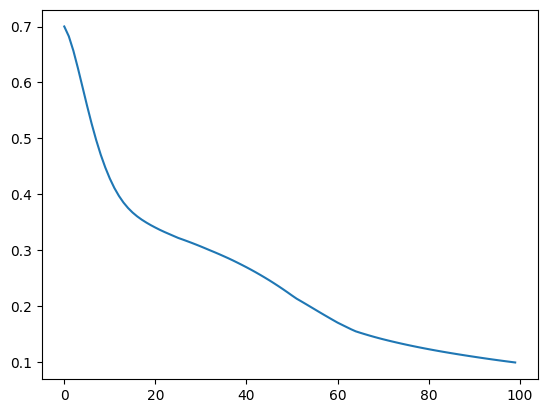

In [ ]:
# Define the Model
model = nn.Sequential(
    nn.Linear(15, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
)

# Train the model
seed = 0
torch.manual_seed(seed)

history = []
loss_bce = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
epochs = 100
batch_size = 100
for epoch in range(epochs):
    for i in range(0, len(X_trn), batch_size):
        X = X_trn_torch[i:i+batch_size]
        y = y_trn_torch[i:i+batch_size]

        y_pred = model(X)
        l = loss_bce(y_pred, y)

        model.zero_grad()
        l.backward()
        optimizer.step()
    history.append(l.item())

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))

print("Loss on test set: %.4f" % (loss_bce(model(X_tst_torch), y_tst_torch)))
plt.plot(history)
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_tst_torch)

# Convert predictions and true labels to 0s and 1s
predictions = (outputs > 0.5).float()  # Assuming threshold of 0.5 for binary classification
true_labels = y_tst_torch

# Calculate accuracy
correct = (predictions == true_labels).sum().item()
total = true_labels.size(0)
accuracy = correct / len(y_tst_torch)

print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 93.55%


# **Regression**

In [ ]:
#read cvs file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question1/Health_Insurance_Dataset.csv")

In [ ]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['region'] = label_encoder.fit_transform(df['region'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [ ]:
#Normalization

df_trn, df_tst = train_test_split( df, test_size=0.3,random_state=46)
X_trn = df_trn.drop(columns=['charges'])
y_trn = df_trn['charges']

X_tst = df_tst.drop(columns=['charges'])
y_tst = df_tst['charges']

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)
y_trn = scaler.fit_transform(y_trn.values.reshape(-1, 1))
y_tst = scaler.fit_transform(y_tst.values.reshape(-1, 1))

In [ ]:
X_trn_torch = torch.tensor (X_trn, dtype=torch.float32)
y_trn_torch = torch.tensor (y_trn, dtype=torch.float32).reshape(-1,1)
X_tst_torch = torch.tensor (X_tst, dtype=torch.float32)
y_tst_torch = torch.tensor (y_tst, dtype=torch.float32).reshape(-1,1)

Epoch  0: loss on final training batch: 0.6503
Epoch  1: loss on final training batch: 0.6706
Epoch  2: loss on final training batch: 0.6651
Epoch  3: loss on final training batch: 0.6488
Epoch  4: loss on final training batch: 0.6471
Epoch  5: loss on final training batch: 0.6495
Epoch  6: loss on final training batch: 0.6507
Epoch  7: loss on final training batch: 0.6492
Epoch  8: loss on final training batch: 0.6476
Epoch  9: loss on final training batch: 0.6464
Epoch 10: loss on final training batch: 0.6442
Epoch 11: loss on final training batch: 0.6403
Epoch 12: loss on final training batch: 0.6334
Epoch 13: loss on final training batch: 0.6182
Epoch 14: loss on final training batch: 0.5885
Epoch 15: loss on final training batch: 0.5305
Epoch 16: loss on final training batch: 0.4293
Epoch 17: loss on final training batch: 0.3336
Epoch 18: loss on final training batch: 0.2747
Epoch 19: loss on final training batch: 0.2725
Epoch 20: loss on final training batch: 0.2811
Epoch 21: los

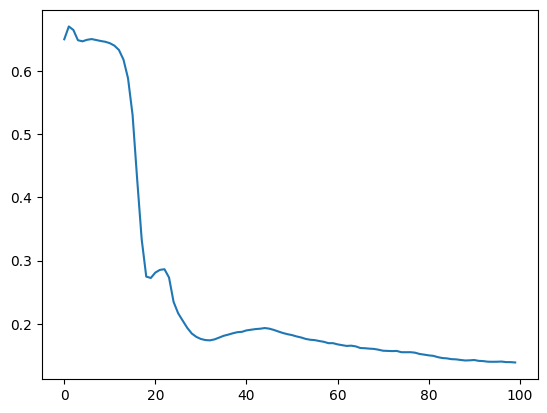

In [ ]:
# Define the Model
model = nn.Sequential(
    nn.Linear(6, 12),
    nn.ReLU(),
    nn.Linear(12, 4),
    nn.ReLU(),
    nn.Linear(4, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
)

# Train the model
history_regression = []
torch.manual_seed(0)
loss_mse = nn.MSELoss()  # Mean Square Error
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum=0.9)
batch_size = 100

# Training the model
epochs = 100
for epoch in range(epochs):

    for i in range(0, len(X_trn), batch_size):
        X = X_trn_torch[i:i+batch_size]
        y = y_trn_torch[i:i+batch_size]

        y_pred = model(X)
        l = loss_mse(y_pred, y)

        model.zero_grad()
        l.backward()
        optimizer.step()
    history_regression.append(l.item())

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))

print("Loss on test set: %.4f" % (loss_mse(model(X_tst_torch), y_tst_torch)))
plt.plot(history_regression)
plt.show()